# Universal Quantum Algorithms For MaxCut And Ising
This Notebook presents a performance demo of the algorithm presented in the paper <br/>
**Universal Quantum Algorithms For The Weighted Maximum Cut Problem And The Ising Model**.


Given an input graph the `MaxCut` class instance computes an outputs an approximate solution for the graph partitioning problem.


# Install
The code depends on the Python packages [numpy](https://numpy.org/install/), [networkx](https://networkx.org/documentation/stable/install.html), [qiskit](https://qiskit.org/documentation/stable/0.24/install.html) and [dwave](https://docs.ocean.dwavesys.com/projects/system/en/latest/installation.html).

- Please download the repository and install the requirements in `requirements.txt` or refer to the product pages for reference.

- Once you satisfied the dependency, run `pip install .` inside the directory.

You can now run the notebook!


## Import the `MaxCut` class

In [3]:
%matplotlib inline

In [4]:
from src.max_cut import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

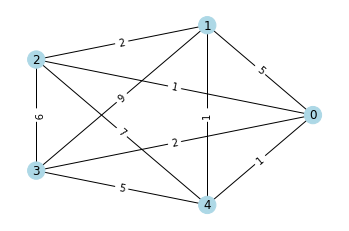

In [5]:
n = 5         # Graph size
p = (1., 0.)  # probabilty by wich (quadratic, unary) edges are generated.
entanglement = {1: None,
                2: 'bell',
                3: 'full',
                4: 'linear',
                5: 'circular'}   # Eventually add entanglement after the Ansatz
mc = MaxCut(n=n, p=p, entanglement=entanglement[1], brute_force=False, exact_costs=False)
mc.draw_graph()

## Plot the circuit

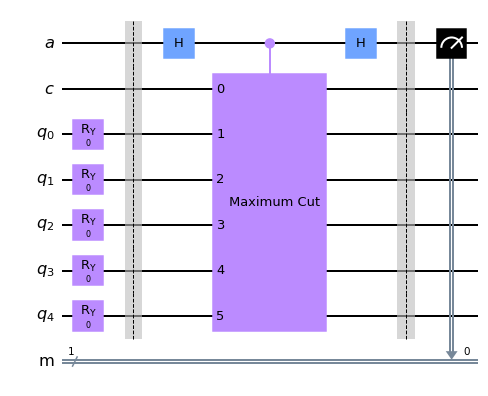

In [6]:
mc.mc_circuit(mc.thetas_opt).draw(output='mpl')

## Optimize the Ansatzes parameters

In [7]:
gradient_method = {1: None,
                   2: 'parameter_shift',
                   3: 'finite_differences',
                   4: 'spsa'}    # Specify the optimization method
optimization_step = {1: 'vanilla',
                     2: 'adam'}  # Specify the step rule
mc.optimize(max_iter=20, alpha_const=1., backtracking=False, gradient_method=gradient_method[2],             optimization_step=optimization_step[1], fine_tuning=False)

PARAMETER SHIFT OPTIMIZATION
Iter 0   , alpha = 2.8   , norm_grad = 0.7       , cost = 10.1834   
Iter 1   , alpha = 2.77  , norm_grad = 10.48     , cost = -9.609    
Iter 2   , alpha = 2.69  , norm_grad = 6.6       , cost = -6.5801   
Iter 3   , alpha = 2.56  , norm_grad = 10.42     , cost = -12.9512  
Iter 4   , alpha = 2.39  , norm_grad = 9.38      , cost = -4.7523   
Iter 5   , alpha = 2.18  , norm_grad = 12.24     , cost = -10.2357  
Iter 6   , alpha = 1.96  , norm_grad = 13.01     , cost = -5.5356   
Iter 7   , alpha = 1.72  , norm_grad = 15.54     , cost = -15.8235  
Iter 8   , alpha = 1.48  , norm_grad = 8.16      , cost = -10.6534  
Iter 9   , alpha = 1.25  , norm_grad = 12.9      , cost = -17.1291  
Iter 10  , alpha = 1.03  , norm_grad = 5.93      , cost = -15.5624  
Iter 11  , alpha = 0.84  , norm_grad = 8.45      , cost = -16.7635  
Iter 12  , alpha = 0.66  , norm_grad = 3.6       , cost = -17.1291  
Iter 13  , alpha = 0.52  , norm_grad = 5.96      , cost = -17.7035  
Iter 

## Get the results


MY RESULTS

Expected Cut =  [0, 3, 4] and [1, 2]
 or [1, 2] and [0, 3, 4]
       Obtained Cut: [0, 3, 4] and [1, 2]
Approximation Ratio: 0.99261474609375
Approximation Index: True
     Execution Time: 47.71496796607971 seconds


<Figure size 432x288 with 0 Axes>

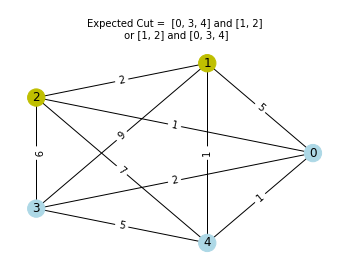

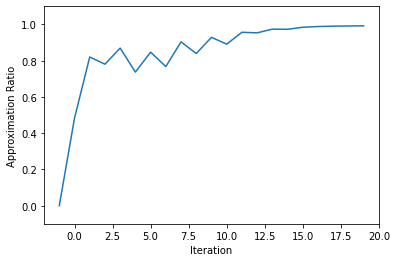

In [8]:
counts = mc.result()

# Citation
If you find this work useful, please cite the article [Article URL](#).
